In [41]:
import pandas as pd
import numpy as np

In [42]:


df = pd.read_pickle('/Users/assiachericoni/Documents/PYTHON/ControllerModeling-main/testAssia/controller_maintest.pkl')

# Now results is a DataFrame containing all the recovery info.
#df = pd.read_csv('/Users/user/PycharmProjects/PacManMain/PacTimeOrig/controllers/results/maintestsecond_slack.csv') 
#result_df = df.loc[df.groupby(['model', 'nrbf', 'opttype', 'gpscaler','tlength'])['wtcorr'].idxmax()]
#grouped_stats = result_df.groupby(['model','nrbf'])['wtcorr'].agg(['mean', 'std'])


In [43]:
df.head()


,wtcorr_p,wtcorr_pv,poscorr_p,poscorr_pv,elbo_p,elbo_pv,trial,gen_model,nrbfs,gpscaler,runidx,real_gains,fit_gains,wtsim,hdi,actual_shift,wtcorr_gen,poscorr_gen,elbo_gen
0,NaN,0.975317,NaN,0.998493,NaN,-106.45007,4,p,20,3,1,"[[5.999928], [5.1719037000000005]]","[[0.010003315], [5.567059]]","[[0.7742767, 0.77798885, 0.7816253, 0.78518325...","[[0.7523497, 0.7563501, 0.76055884, 0.76422244...","[[0.5267610921178089, 0.5234794364259798, 0.52...",-0.682591,0.475711,-9645.3545
1,NaN,-0.266651,NaN,0.882636,NaN,-648.34686,12,p,20,3,1,"[[21.5775291], [5.6240202]]","[[21.407984], [5.8911057]]","[[0.5162934, 0.5320337, 0.5517859, 0.57548535,...","[[0.43557674, 0.44719344, 0.46335378, 0.483340...","[[0.5345302897485577, 0.5560408735191747, 0.57...",0.995964,0.999403,-79.96618
2,NaN,0.981961,NaN,0.999975,NaN,-255.16359,18,p,20,3,1,"[[0.70704915], [15.481307999999999]]","[[0.81612074], [13.81801]]","[[0.39918965, 0.4255874, 0.4975482, 0.60810155...","[[0.30478635, 0.33400083, 0.4122198, 0.5031448...","[[0.4698860234915062, 0.4985039018771155, 0.54...",0.984031,0.999992,-75.306656
3,NaN,0.856794,NaN,0.999928,NaN,-216.34402,20,p,20,3,1,"[[4.9954047], [0.030000033]]","[[6.94137], [0.016060272]]","[[0.14685981, 0.14162639, 0.13672794, 0.132155...","[[0.071502365, 0.06847532, 0.065961, 0.0635898...","[[0.16034915045519968, 0.15944489535550616, 0....",0.860525,0.999976,-228.07535
4,NaN,0.069080,NaN,0.525049,NaN,-2963.9365,22,p,20,3,1,"[[10.1318706], [4.3532244]]","[[0.010000483], [4.441177]]","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[[0.99999905, 0.99999917, 0.9999994, 0.9999996...","[[0.15412842940181, 0.15262149580988238, 0.151...",0.136977,0.300077,-4650.9565


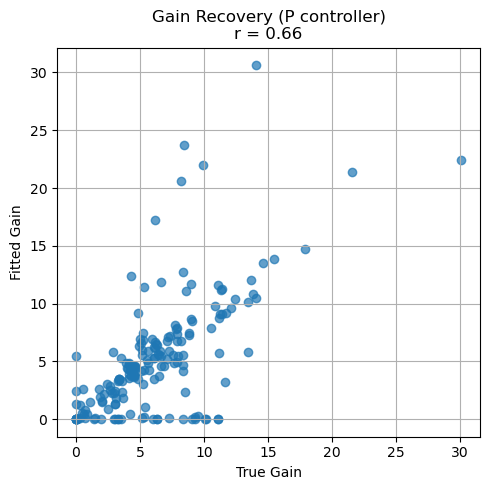

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your dataframe and contains 'real_gains' and 'fit_gains'
# These columns are lists of lists, e.g. [[gain1, gain2]] per row (but for p, just one gain per trial)

# Extract and flatten
real_gains_flat = []
fit_gains_flat = []

for idx, row in df.iterrows():
    real = row['real_gains']
    fit = row['fit_gains']
    for r, f in zip(np.array(real).flatten(), np.array(fit).flatten()):
        real_gains_flat.append(r)
        fit_gains_flat.append(f)

real_gains_flat = np.array(real_gains_flat)
fit_gains_flat = np.array(fit_gains_flat)

# Correlation
r = np.corrcoef(real_gains_flat, fit_gains_flat)[0, 1]

# Plot
plt.figure(figsize=(5,5))
plt.scatter(real_gains_flat, fit_gains_flat, alpha=0.7)
plt.xlabel('True Gain')
plt.ylabel('Fitted Gain')
plt.title(f'Gain Recovery (P controller)\nr = {r:.2f}')
plt.grid(True)
plt.tight_layout()
plt.show()


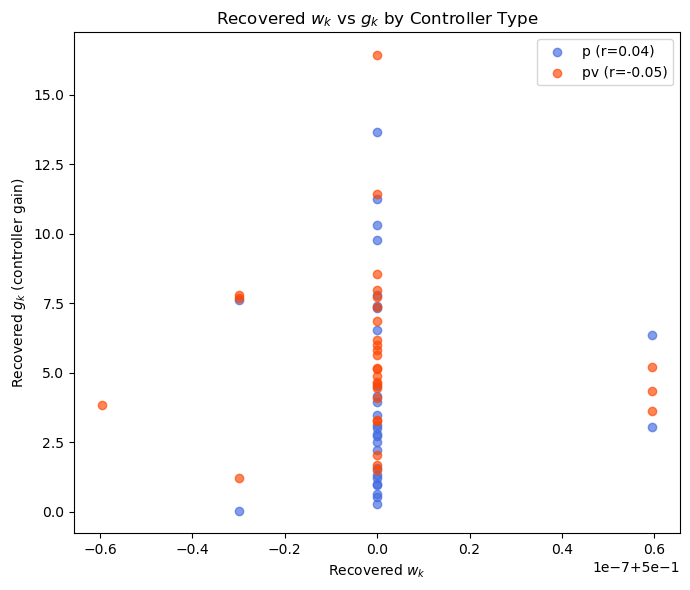

In [45]:
import matplotlib.pyplot as plt
import numpy as np

models = ['p', 'pv']
colors = ['royalblue', 'orangered', 'seagreen', 'goldenrod', 'purple', 'teal']

plt.figure(figsize=(7,6))

for m, color in zip(models, colors):
    recovered_wk = []
    recovered_gk = []
    for _, row in df.iterrows():
        if row.get('gen_model', None) != m:
            continue
        # Mean wt
        wt = row['wtsim']
        if isinstance(wt, (list, np.ndarray)):
            w_val = np.mean(np.array(wt).flatten())
        else:
            continue
        # Mean gain
        fit_gains = row['fit_gains']
        if isinstance(fit_gains, (list, np.ndarray)):
            g_val = np.mean(np.array(fit_gains).flatten())
        else:
            continue
        recovered_wk.append(w_val)
        recovered_gk.append(g_val)
    # Scatter plot for this controller
    if len(recovered_wk) > 1:
        r = np.corrcoef(recovered_wk, recovered_gk)[0,1]
        plt.scatter(recovered_wk, recovered_gk, alpha=0.65, color=color, label=f'{m} (r={r:.2f})')

plt.xlabel('Recovered $w_k$')
plt.ylabel('Recovered $g_k$ (controller gain)')
plt.title('Recovered $w_k$ vs $g_k$ by Controller Type')
plt.legend()
plt.tight_layout()
plt.show()


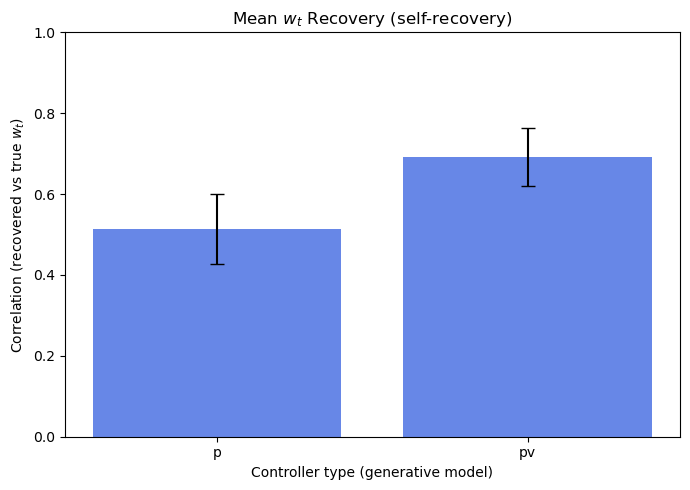

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Assume your DataFrame is named df and has columns: 'gen_model', 'wtcorr_gen'
models = ['p','pv']
means = []
sems = []

for m in models:
    vals = df[df['gen_model'] == m]['wtcorr_gen'].dropna().values
    if len(vals) > 0:
        means.append(np.mean(vals))
        sems.append(np.std(vals) / np.sqrt(len(vals)))
    else:
        means.append(np.nan)
        sems.append(np.nan)

x = np.arange(len(models))
plt.figure(figsize=(7,5))
plt.bar(x, means, yerr=sems, color='royalblue', alpha=0.8, capsize=5)
plt.xticks(x, models)
plt.ylabel('Correlation (recovered vs true $w_t$)')
plt.xlabel('Controller type (generative model)')
plt.title('Mean $w_t$ Recovery (self-recovery)')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


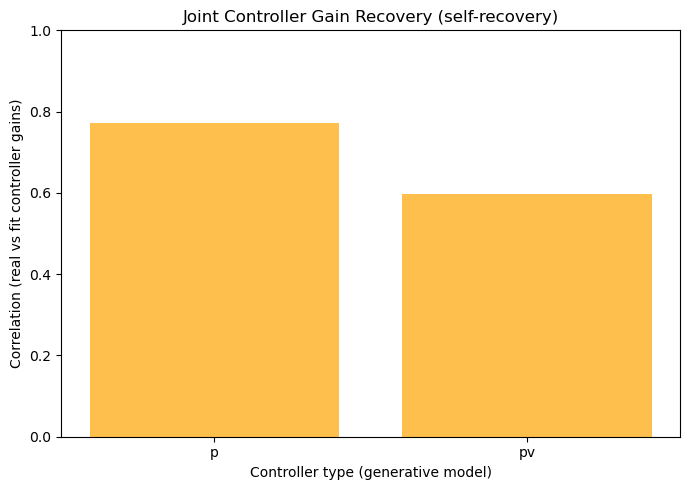

p: r=0.77
pv: r=0.60


In [48]:
import numpy as np
import matplotlib.pyplot as plt

models = ['p','pv']
gain_corr_means = []
gain_corr_sems = []

for m in models:
    all_real = []
    all_fit = []
    for _, row in df[df['gen_model'] == m].iterrows():
        # Handle NaN/empty
        if row['real_gains'] is None or row['fit_gains'] is None:
            continue
        # Extract and flatten real and fit gains
        real = np.array([float(x[0]) for x in row['real_gains']])
        fit  = np.array([float(x[0]) for x in row['fit_gains']])
        if len(real) == 2 and len(fit) == 2:
            all_real.extend(real)
            all_fit.extend(fit)
    # Joint correlation across all runs for this model
    if len(all_real) > 1 and len(all_fit) > 1:
        corr = np.corrcoef(all_real, all_fit)[0,1]
        gain_corr_means.append(corr)
        gain_corr_sems.append(0)   # SEM not meaningful for joint pool
    else:
        gain_corr_means.append(np.nan)
        gain_corr_sems.append(np.nan)

x = np.arange(len(models))
plt.figure(figsize=(7,5))
plt.bar(x, gain_corr_means, color='orange', alpha=0.7)
plt.xticks(x, models)
plt.ylabel('Correlation (real vs fit controller gains)')
plt.xlabel('Controller type (generative model)')
plt.title('Joint Controller Gain Recovery (self-recovery)')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Print actual values for reference
for m, c in zip(models, gain_corr_means):
    print(f"{m}: r={c:.2f}")


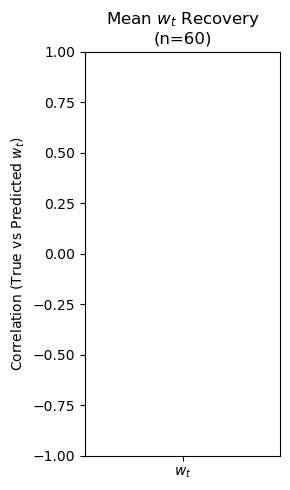

Mean: nan, SEM: nan


In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Get the w_t correlations for each run
wt_corrs = df['wtcorr_pv'].values  # Replace with correct column if needed

# Compute mean and SEM
mean_corr = np.mean(wt_corrs)
sem_corr = np.std(wt_corrs) / np.sqrt(len(wt_corrs))

# Plot
plt.figure(figsize=(3, 5))
plt.bar([0], [mean_corr], yerr=[sem_corr], capsize=8, color='royalblue')
plt.ylabel("Correlation (True vs Predicted $w_t$)")
plt.title("Mean $w_t$ Recovery\n(n={})".format(len(wt_corrs)))
plt.xticks([0], ['$w_t$'])
plt.ylim(-1, 1)  # If correlations can be negative
plt.tight_layout()
plt.show()

print(f"Mean: {mean_corr:.3f}, SEM: {sem_corr:.3f}")


In [15]:
wt_corrs

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
      dtype=object)

In [18]:
len(df)

10